# Find all the image files.

In [5]:
import os

file_paths = []
for root, subdirs, file_names in os.walk('../Datasets'):
    for file_name in file_names:
        if '.jpg' in file_name:
            file_paths.append(os.path.join(root, file_name))

print('Found {} files.'.format(len(file_paths)))

Found 8031 files.


# Check the file dimensions.

In [43]:
from PIL import Image

widths = []
heights = []
for file_path in file_paths:
    image = Image.open(file_path)
    width, height = image.size
    widths.append(width)
    heights.append(height)

In [44]:
import numpy as np

def DisplayStats(arr):
    print('Min: {}'.format(min(arr)))
    print('1st pct: {}'.format(np.percentile(arr, 1)))
    print('10th pct: {}'.format(np.percentile(arr, 10)))
    print('25th pct: {}'.format(np.percentile(arr, 25)))
    print('50th pct: {}'.format(np.percentile(arr, 50)))
    print('75th pct: {}'.format(np.percentile(arr, 75)))
    print('90th pct: {}'.format(np.percentile(arr, 90)))
    print('99th pct: {}'.format(np.percentile(arr, 99)))
    print('Max: {}'.format(max(arr)))
    print('Mean: {:.2f}'.format(np.mean(arr)))
    print('Std: {:.2f}'.format(np.std(arr)))
    
print('Height statistics:')
DisplayStats(heights)
print('\nHeight statistics:')
DisplayStats(widths)

Height statistics:
Min: 1933
1st pct: 2371.0
10th pct: 2886.0
25th pct: 3023.0
50th pct: 3209.0
75th pct: 3348.0
90th pct: 4009.0
99th pct: 5154.0
Max: 5286
Mean: 3295.15
Std: 470.15

Height statistics:
Min: 1146
1st pct: 1698.4
10th pct: 1804.0
25th pct: 1923.0
50th pct: 2120.0
75th pct: 2233.0
90th pct: 2640.0
99th pct: 3327.7
Max: 3442
Mean: 2148.62
Std: 326.28


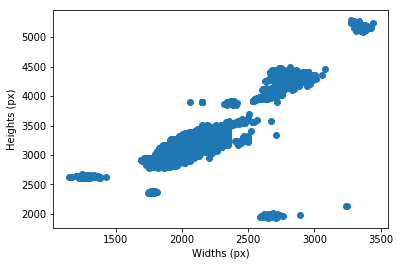

In [45]:
from matplotlib import pyplot as plt

plt.scatter(widths, heights)
plt.xlabel('Widths (px)')
plt.ylabel('Heights (px)')
plt.show()

# Check if the images are legibal @ 320x480

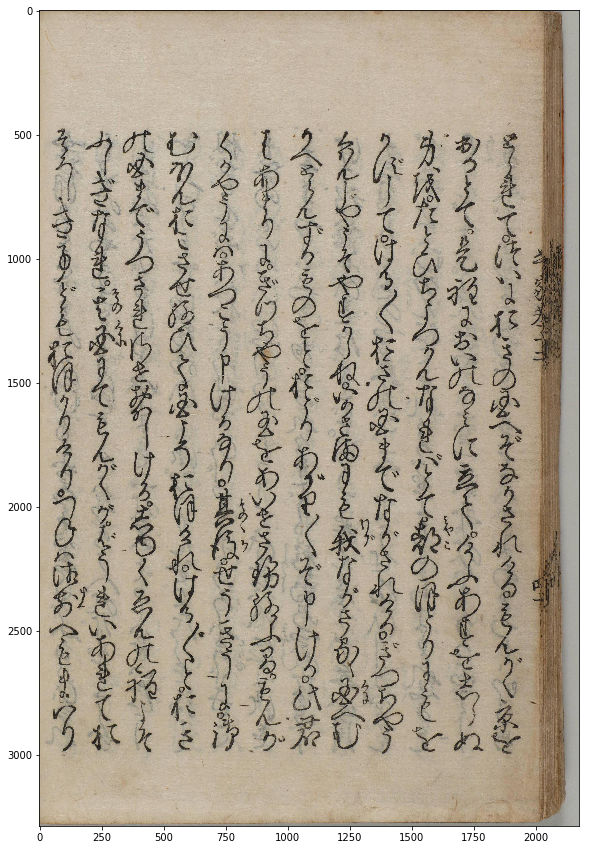

In [29]:
original_test_image = Image.open(file_paths[1234])
plt.figure(figsize=(15, 15))
plt.imshow(original_test_image)
plt.show()

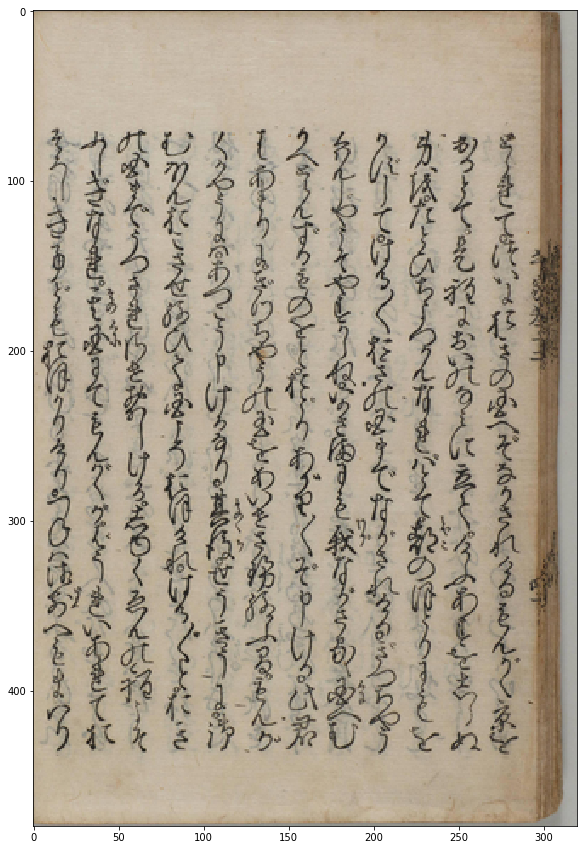

In [35]:
plt.figure(figsize=(15, 15))
scaled_test_image = original_test_image.resize((320,480), Image.LANCZOS)
plt.imshow(scaled_test_image)
plt.show()

# Display the image with the weirdest aspect ratio.

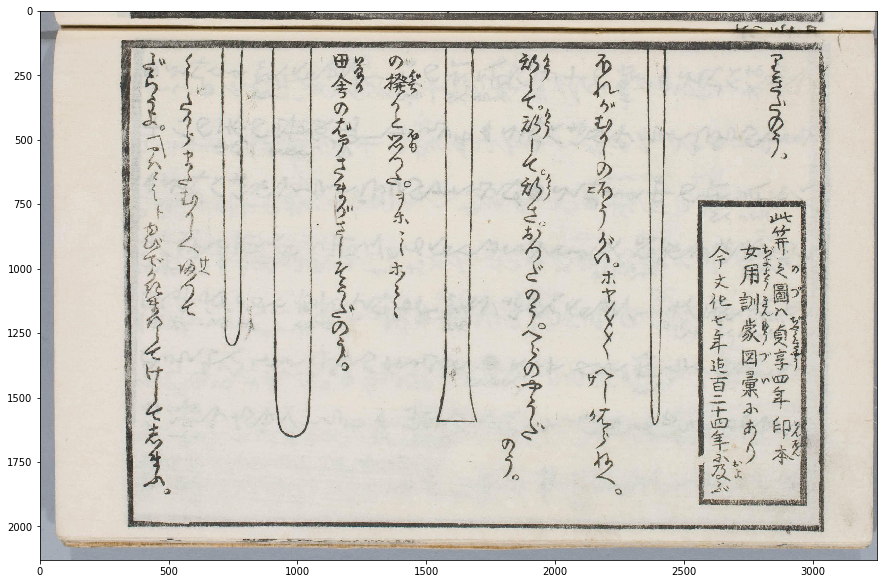

In [50]:
aspect_ratios = np.array(heights)/np.array(widths)
aspect_ratio_deviations = (aspect_ratios - np.mean(aspect_ratios))**2
weirdest_aspect_ratio_file_path = file_paths[np.argmax(aspect_ratio_deviations)]
#weirdest_aspect_ratio_file_path = file_paths[np.argmin(aspect_ratios)]
weirdest_aspect_ratio_image = Image.open(weirdest_aspect_ratio_file_path)
plt.figure(figsize=(15, 15))
plt.imshow(weirdest_aspect_ratio_image)
plt.show()

In [51]:
print('Weirdest aspect ratio: {:.2f} ({} x {})'.format(
    aspect_ratios[np.argmax(aspect_ratio_deviations)],
    *weirdest_aspect_ratio_image.size))

Weirdest aspect ratio: 0.66 (3248 x 2130)


# Display the image that is the most colorful.

In [60]:
import datetime

color_checking_start_time = datetime.datetime.now()

colorfulness_heuristics = []
for file_path in file_paths[:3000]:
    image_data = np.asarray(Image.open(file_path))
    min_rgb_vals = np.min(image_data, axis = 2)
    max_rgb_vals = np.max(image_data, axis = 2)
    colorfulness_heuristic = np.mean(max_rgb_vals - min_rgb_vals)
    colorfulness_heuristics.append(colorfulness_heuristic)
    
print('Runtime:', datetime.datetime.now() - color_checking_start_time)

Runtime: 0:10:38.821071


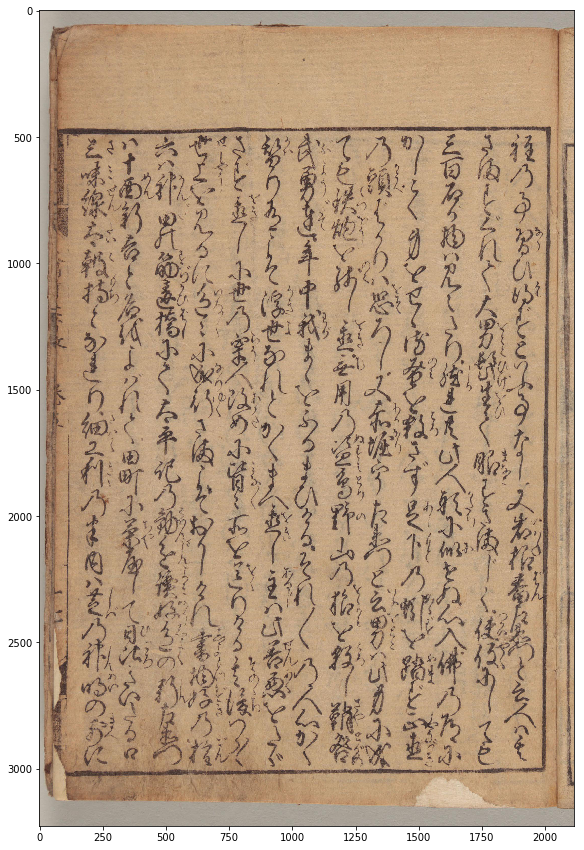

In [61]:
most_colorful_image_file_path = file_paths[np.argmax(colorfulness_heuristics)]
most_colorful_image = Image.open(most_colorful_image_file_path)
plt.figure(figsize=(15, 15))
plt.imshow(most_colorful_image)
plt.show()

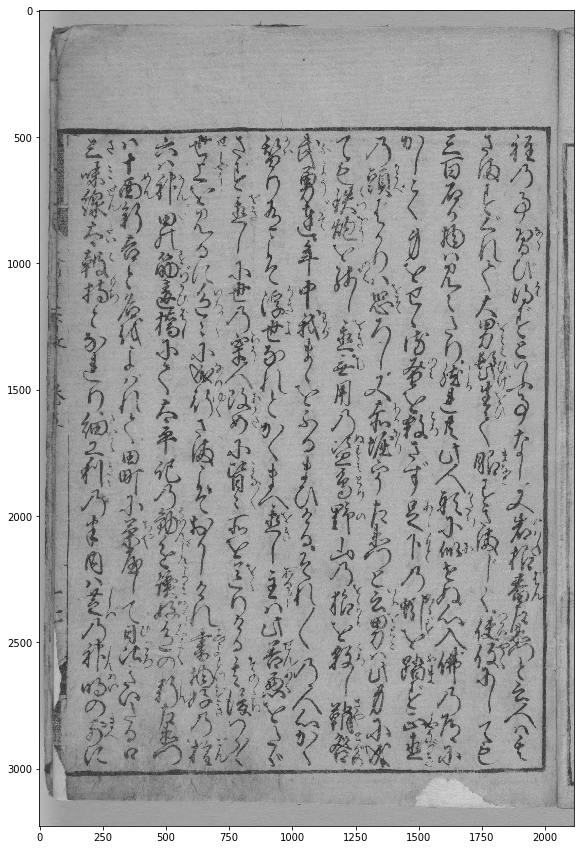

In [67]:
plt.figure(figsize=(15, 15))
plt.imshow(most_colorful_image.convert('L'))
plt.show()

In [68]:
np.asarray(most_colorful_image.convert('L')).shape

(3226, 2114)